# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [34]:
#kmr weatherpy workbook
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress
import json

# Import API key
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [35]:
# Test to determine if the API key and url are working before gettign too far down the road
# Build query URL and request your results in Celsius
url = "http://api.openweathermap.org/data/2.5/weather?"
town = "Burundi"
# Get weather data
xquery_url = url + "appid=" + api_key + "&q=" + town
# Get temperature from JSON response
weather_response = requests.get(xquery_url).json()
weather_json = weather_response['main']['temp']
# Report temperature
print(f"The weather API responded with: {weather_json}.")
print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")

The weather API responded with: 290.25.
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


## Generate Cities List

In [36]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
#len(cities)
fullset = len(cities)
print("The number of randomly generated cities in the project scope")
print(fullset)
#print(cities)

The number of randomly generated cities in the project scope
613


In [37]:
# Build a data frame to capture each cities weather information
cities_df = {
    "City": cities,
}
cities_df = pd.DataFrame(cities_df)
print("Exhibit 1a: Cities in the project with a place to capture weather data")

# set up additional columns to hold information
cities_df['Lat'] = 0
cities_df['Lng'] = 0
cities_df['Temp Max'] = 0
cities_df['Humidity'] = 0
cities_df['Cloudiness'] = 0
cities_df['Wind Speed'] = 0
cities_df['Country'] = ""
cities_df['Date'] = ""
cities_df.head()

Exhibit 1a: Cities in the project with a place to capture weather data


,City,Lat,Lng,Temp Max,Humidity,Cloudiness,Wind Speed,Country,Date
0,punta arenas,0,0,0,0,0,0,,
1,bluff,0,0,0,0,0,0,,
2,saint-joseph,0,0,0,0,0,0,,
3,castro,0,0,0,0,0,0,,
4,ribeira grande,0,0,0,0,0,0,,


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [38]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="

counter = 0

# Loop through the list of cities and perform a request for data on each
print("Checkpoint: Confirmation listing of cities processed through OpenWeather Site")

for index, row in cities_df.iterrows():
    cityname = row['City']
    counter = counter + 1
    
    if counter >= 501:
        print("**Done running the first batch**")
        break
    
    if counter <= 500:
        time.sleep(1)
        print(f"Processing Record {counter} of {fullset}. City = {cityname}")
        
        try:
            response = requests.get(query_url + cityname).json()   
            cities_df.loc[index, 'Lat'] = response['coord']['lat']
            cities_df.loc[index, 'Lng'] = response['coord']['lon']
            cities_df.loc[index, 'Temp Max'] = response['main']['temp_max']
            cities_df.loc[index, 'Humidity'] = response['main']['humidity']
            cities_df.loc[index, 'Cloudiness'] = response['clouds']['all']
            cities_df.loc[index, 'Wind Speed'] = response['wind']['speed']
            cities_df.loc[index, 'Country'] = response['sys']['country']
            cities_df.loc[index, 'Date'] = response['dt']
         
        except (KeyError, IndexError, ValueError):
            print(f"... skipped over  " + cityname + "  because it lacked sufficient information")
            #cities_df.remove(cityname) ... doesn't work here
            pass

# First attempt structure going to lists instead of dataframes
# Create lists to capture date for use in data frame
#cities = ['London', 'xxToronto','nanortalik', 'haines junction', 'ancud', 'mikkeli', 'daru', 'vaini', 'bethel', 'vostok']
#cities = cities
# lat = []
# lng = []
# temp_max = []
# humidity = []
# cloudiness = []
# wind_speed = []
# country = []
# date = []
#for city in cities:
#             lat.append(response['coord']['lat'])
#             lng.append(response['coord']['lon'])
#             temp_max.append(response['main']['temp_max'])
#             humidity.append(response['main']['humidity'])
#             cloudiness.append(response['clouds']['all'])
#             wind_speed.append(response['wind']['speed'])
#             country.append(response['sys']['country'])
#             date.append(response['dt'])


Checkpoint: Confirmation listing of cities processed through OpenWeather Site
Processing Record 1 of 613. City = punta arenas
Processing Record 2 of 613. City = bluff
Processing Record 3 of 613. City = saint-joseph
Processing Record 4 of 613. City = castro
Processing Record 5 of 613. City = ribeira grande
Processing Record 6 of 613. City = ushuaia
Processing Record 7 of 613. City = tiksi
Processing Record 8 of 613. City = spearfish
Processing Record 9 of 613. City = albany
Processing Record 10 of 613. City = camacha
Processing Record 11 of 613. City = cherskiy
Processing Record 12 of 613. City = guerrero negro
Processing Record 13 of 613. City = ponta do sol
Processing Record 14 of 613. City = port alfred
Processing Record 15 of 613. City = roald
Processing Record 16 of 613. City = monrovia
Processing Record 17 of 613. City = dingle
Processing Record 18 of 613. City = avarua
Processing Record 19 of 613. City = corrales
Processing Record 20 of 613. City = odienne
Processing Record 21 of

Processing Record 158 of 613. City = narsaq
Processing Record 159 of 613. City = severo-kurilsk
Processing Record 160 of 613. City = leningradskiy
Processing Record 161 of 613. City = husavik
Processing Record 162 of 613. City = bandarbeyla
Processing Record 163 of 613. City = bose
Processing Record 164 of 613. City = jammalamadugu
Processing Record 165 of 613. City = kavieng
Processing Record 166 of 613. City = mitsamiouli
Processing Record 167 of 613. City = trairi
Processing Record 168 of 613. City = carnarvon
Processing Record 169 of 613. City = nanortalik
Processing Record 170 of 613. City = irbil
Processing Record 171 of 613. City = urusha
Processing Record 172 of 613. City = port hardy
Processing Record 173 of 613. City = troy
Processing Record 174 of 613. City = fairbanks
Processing Record 175 of 613. City = khatanga
Processing Record 176 of 613. City = buala
Processing Record 177 of 613. City = lintangan
Processing Record 178 of 613. City = pecos
Processing Record 179 of 613. 

Processing Record 319 of 613. City = lashio
Processing Record 320 of 613. City = baykit
Processing Record 321 of 613. City = berlevag
Processing Record 322 of 613. City = shingu
Processing Record 323 of 613. City = davila
Processing Record 324 of 613. City = hobyo
Processing Record 325 of 613. City = nemuro
Processing Record 326 of 613. City = labuhan
Processing Record 327 of 613. City = xichang
Processing Record 328 of 613. City = pangnirtung
Processing Record 329 of 613. City = alofi
Processing Record 330 of 613. City = nhulunbuy
Processing Record 331 of 613. City = lewistown
Processing Record 332 of 613. City = gorno-chuyskiy
... skipped over  gorno-chuyskiy  because it lacked sufficient information
Processing Record 333 of 613. City = prince rupert
Processing Record 334 of 613. City = launceston
Processing Record 335 of 613. City = carinhanha
Processing Record 336 of 613. City = port lincoln
Processing Record 337 of 613. City = kamenka
Processing Record 338 of 613. City = walvis ba

Processing Record 473 of 613. City = ballymena
Processing Record 474 of 613. City = san cristobal
Processing Record 475 of 613. City = jiwani
Processing Record 476 of 613. City = namatanai
Processing Record 477 of 613. City = igrim
Processing Record 478 of 613. City = artyk
... skipped over  artyk  because it lacked sufficient information
Processing Record 479 of 613. City = riohacha
Processing Record 480 of 613. City = yanam
Processing Record 481 of 613. City = vestmannaeyjar
Processing Record 482 of 613. City = houma
Processing Record 483 of 613. City = igarka
Processing Record 484 of 613. City = santarem
Processing Record 485 of 613. City = snezhnogorsk
Processing Record 486 of 613. City = kenora
Processing Record 487 of 613. City = manggar
Processing Record 488 of 613. City = nelson bay
Processing Record 489 of 613. City = caravelas
Processing Record 490 of 613. City = sarangani
Processing Record 491 of 613. City = matara
Processing Record 492 of 613. City = verkhnevilyuysk
Process

In [70]:
# Provide a review list of all cities checked for weather data
cities_df = cities_df.dropna(how='any')
print("Exhibit 1b: Cities with their available weather data")
cities_df.to_csv("output_data/1bex_citiespostapicall.csv", index=False, header=True)
cities_df.head()

Exhibit 1b: Cities with their available weather data


,City,Lat,Lng,Temp Max,Humidity,Cloudiness,Wind Speed,Country,Date
0,punta arenas,-53.15,-70.92,12.00,46,0,7.20,CL,1603392831
1,bluff,-46.60,168.33,10.00,90,100,0.89,NZ,1603392832
2,saint-joseph,-21.37,55.62,23.00,78,0,5.10,RE,1603392834
3,castro,-24.79,-50.01,24.57,50,2,3.87,BR,1603392835
4,ribeira grande,38.52,-28.70,18.00,77,75,5.70,PT,1603392836


In [71]:
# Remove cities that did not have a full set of weather data available from the data frame
print("Exhibit 1c: Cities with a full set of weather data")
#cities_df = cities_df.dropna()
cities_df = cities_df.loc[cities_df["Date"] != ""]
cities_df.to_csv("output_data/1cex_cleancities.csv", index=False, header=True)
cities_df.head()

Exhibit 1c: Cities with a full set of weather data


,City,Lat,Lng,Temp Max,Humidity,Cloudiness,Wind Speed,Country,Date
0,punta arenas,-53.15,-70.92,12.00,46,0,7.20,CL,1603392831
1,bluff,-46.60,168.33,10.00,90,100,0.89,NZ,1603392832
2,saint-joseph,-21.37,55.62,23.00,78,0,5.10,RE,1603392834
3,castro,-24.79,-50.01,24.57,50,2,3.87,BR,1603392835
4,ribeira grande,38.52,-28.70,18.00,77,75,5.70,PT,1603392836


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [72]:
# Export the randomly generated list of cities to to a csv file ... this is a backup file to 1c. above
cities_df.to_csv("output_data/1dex_cleancities.csv", index=False, header=True)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [73]:
# Inspect and remove cities with humidity greater than 100%
print("Exhibit 2: Table with in scope cities and their weather data. (Note: Cities with humidity >100% removed)")
dehumidified = cities_df.loc[cities_df["Humidity"] <= 100]
dehumidified.head()

Exhibit 2: Table with in scope cities and their weather data. (Note: Cities with humidity >100% removed)


,City,Lat,Lng,Temp Max,Humidity,Cloudiness,Wind Speed,Country,Date
0,punta arenas,-53.15,-70.92,12.00,46,0,7.20,CL,1603392831
1,bluff,-46.60,168.33,10.00,90,100,0.89,NZ,1603392832
2,saint-joseph,-21.37,55.62,23.00,78,0,5.10,RE,1603392834
3,castro,-24.79,-50.01,24.57,50,2,3.87,BR,1603392835
4,ribeira grande,38.52,-28.70,18.00,77,75,5.70,PT,1603392836


In [74]:
print("Exhibit 3: List of cities removed from project because humidity was greater than 100% (blank if none)")
humidoutliers = cities_df.loc[cities_df["Humidity"] > 100]
humidoutliers.head()

Exhibit 3: List of cities removed from project because humidity was greater than 100% (blank if none)


,City,Lat,Lng,Temp Max,Humidity,Cloudiness,Wind Speed,Country,Date


In [75]:
# Export the data frame to a csv file
dehumidified.to_csv("output_data/2ex_cleancitydata.csv", index=False, header=True)
humidoutliers.to_csv("output_data/3ex_citieswithtoomuchhumidity.csv", index=False, header=True)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

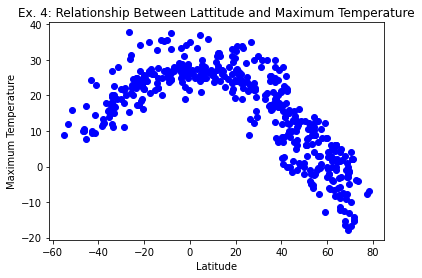

In [76]:
# Compare latitude to temperature
x_axis = dehumidified["Lat"]
y_axis = dehumidified["Temp Max"]
plt.title("Ex. 4: Relationship Between Lattitude and Maximum Temperature")
plt.xlabel("Latitude")
plt.ylabel("Maximum Temperature")
plt.scatter(x_axis, y_axis, marker="o", color="blue")
plt.savefig("output_data/4chart_lat2temp.png")
plt.show()

## Latitude vs. Humidity Plot

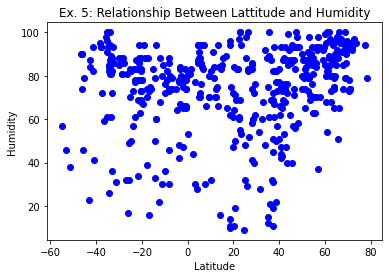

In [77]:
# Compare latitude to humidity
x_axis = dehumidified["Lat"]
y_axis = dehumidified["Humidity"]
plt.title("Ex. 5: Relationship Between Lattitude and Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.scatter(x_axis, y_axis, marker="o", color="blue")
plt.savefig("output_data/5chart_lat2humidity.png")
plt.show()

## Latitude vs. Cloudiness Plot

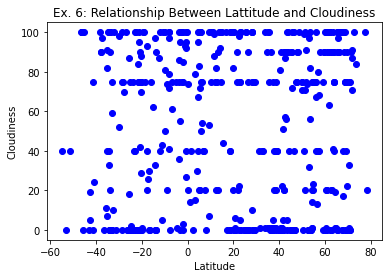

In [78]:
# Compare latitude to cloudiness
x_axis = dehumidified["Lat"]
y_axis = dehumidified["Cloudiness"]
plt.title("Ex. 6: Relationship Between Lattitude and Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.scatter(x_axis, y_axis, marker="o", color="blue")
plt.savefig("output_data/6chart_lat2cloudiness.png")
plt.show()

## Latitude vs. Wind Speed Plot

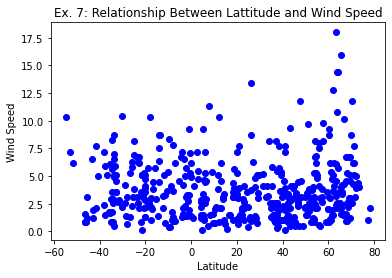

In [79]:
# Compare latitude to wind speed
x_axis = dehumidified["Lat"]
y_axis = dehumidified["Wind Speed"]
plt.title("Ex. 7: Relationship Between Lattitude and Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.scatter(x_axis, y_axis, marker="o", color="blue")
plt.savefig("output_data/7chart_lat2windspeed.png")
plt.show()

## Linear Regression

In [80]:
# Build a northern hemisphere data frame
northern = dehumidified.loc[dehumidified["Lat"] >= 0]
print("Exhibit 8: Table of cities at or north of equator. (Note: Cities with humidity >100% removed)")
northern.to_csv("output_data/8ex_northernhemisphere.csv", index=False, header=True)
northern.head()

Exhibit 8: Table of cities at or north of equator. (Note: Cities with humidity >100% removed)


,City,Lat,Lng,Temp Max,Humidity,Cloudiness,Wind Speed,Country,Date
4,ribeira grande,38.52,-28.70,18.00,77,75,5.70,PT,1603392836
6,tiksi,71.69,128.87,-14.26,93,71,3.15,RU,1603392841
7,spearfish,44.49,-103.86,-1.67,92,40,4.10,US,1603392580
8,albany,42.60,-73.97,21.67,68,57,1.16,US,1603392633
9,camacha,33.08,-16.33,19.00,68,40,4.10,PT,1603392845


In [81]:
# Build a southern hemisphere data frame
southern = dehumidified.loc[dehumidified["Lat"] < 0]
print("Exhibit 9: Table of cities south of equator. (Note: Cities with humidity >100% removed)")
southern.to_csv("output_data/9ex_southernhemisphere.csv", index=False, header=True)
southern.head()

Exhibit 9: Table of cities south of equator. (Note: Cities with humidity >100% removed)


,City,Lat,Lng,Temp Max,Humidity,Cloudiness,Wind Speed,Country,Date
0,punta arenas,-53.15,-70.92,12.00,46,0,7.20,CL,1603392831
1,bluff,-46.60,168.33,10.00,90,100,0.89,NZ,1603392832
2,saint-joseph,-21.37,55.62,23.00,78,0,5.10,RE,1603392834
3,castro,-24.79,-50.01,24.57,50,2,3.87,BR,1603392835
5,ushuaia,-54.80,-68.30,9.00,57,40,10.30,AR,1603392838


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

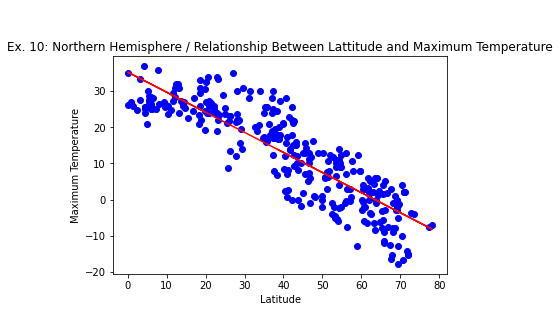

The correlation coefficient is -0.87
The line equation is as follows:  y = -0.56x + 35.29


In [82]:
#Compare latitude to temperature
x_axis = northern["Lat"]
y_axis = northern["Temp Max"]
plt.title("Ex. 10: Northern Hemisphere / Relationship Between Lattitude and Maximum Temperature")
plt.xlabel("Latitude")
plt.ylabel("Maximum Temperature")
plt.scatter(x_axis, y_axis, marker="o", color="blue")
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.savefig("output_data/10chart_northlat2temp.png")
plt.show()
print(f"The correlation coefficient is {round(st.pearsonr(x_axis,y_axis)[0],2)}")
print(f"The line equation is as follows:  {line_eq}")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

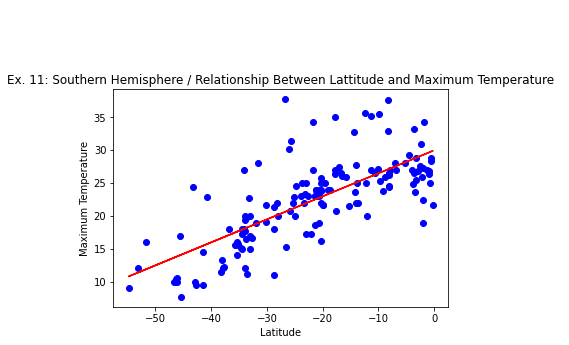

The correlation coefficient is 0.73
The line equation is as follows:  y = 0.35x + 30.0


In [83]:
# Compare latitude to temperature
x_axis = southern["Lat"]
y_axis = southern["Temp Max"]
plt.title("Ex. 11: Southern Hemisphere / Relationship Between Lattitude and Maximum Temperature")
plt.xlabel("Latitude")
plt.ylabel("Maximum Temperature")
plt.scatter(x_axis, y_axis, marker="o", color="blue")
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis.astype(float), y_axis.astype(float))
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.savefig("output_data/11chart_southlat2temp.png")
plt.show()
print(f"The correlation coefficient is {round(st.pearsonr(x_axis,y_axis)[0],2)}")
print(f"The line equation is as follows:  {line_eq}")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

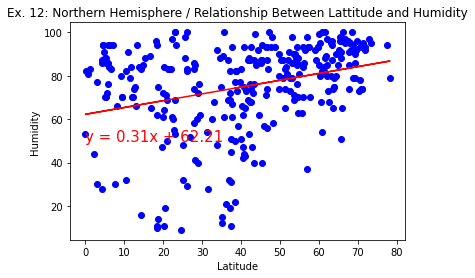

The correlation coefficient is 0.31
The line equation is as follows:  y = 0.31x + 62.21


In [84]:
#Compare latitude to humidity
x_axis = northern["Lat"]
y_axis = northern["Humidity"]  
plt.title("Ex. 12: Northern Hemisphere / Relationship Between Lattitude and Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.scatter(x_axis, y_axis, marker="o", color="blue")
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.savefig("output_data/12chart_northlat2humidity.png")
plt.show()
print(f"The correlation coefficient is {round(st.pearsonr(x_axis,y_axis)[0],2)}")
print(f"The line equation is as follows:  {line_eq}")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

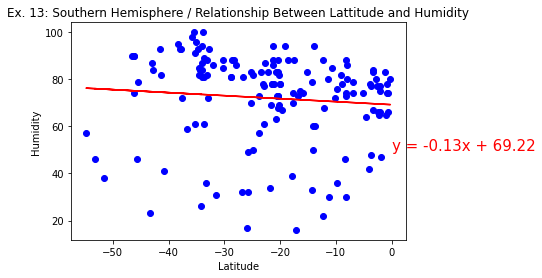

The correlation coefficient is -0.09
The line equation is as follows:  y = -0.13x + 69.22


In [85]:
# Compare latitude to humidity
x_axis = southern["Lat"]
y_axis = southern["Humidity"]
plt.title("Ex. 13: Southern Hemisphere / Relationship Between Lattitude and Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.scatter(x_axis, y_axis, marker="o", color="blue")
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis.astype(float), y_axis.astype(float))
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.savefig("output_data/13chart_southlat2humidity.png")
plt.show()
print(f"The correlation coefficient is {round(st.pearsonr(x_axis,y_axis)[0],2)}")
print(f"The line equation is as follows:  {line_eq}")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

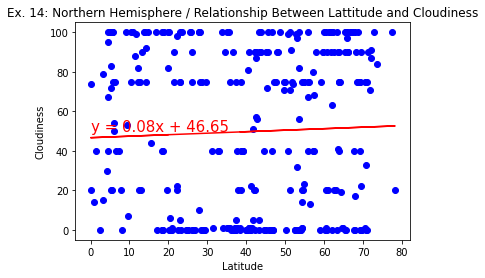

The correlation coefficient is 0.04
The line equation is as follows:  y = 0.08x + 46.65


In [86]:
#Compare latitude to cloudiness
x_axis = northern["Lat"]
y_axis = northern["Cloudiness"]
plt.title("Ex. 14: Northern Hemisphere / Relationship Between Lattitude and Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.scatter(x_axis, y_axis, marker="o", color="blue")
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.savefig("output_data/14chart_northlat2cloudiness.png")
plt.show()
print(f"The correlation coefficient is {round(st.pearsonr(x_axis,y_axis)[0],2)}")
print(f"The line equation is as follows:  {line_eq}")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

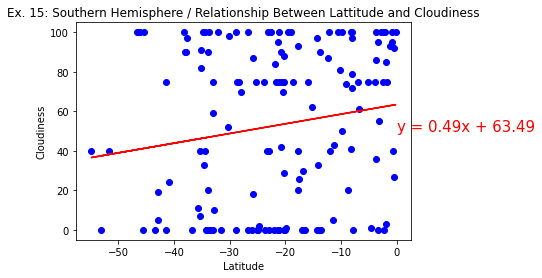

The correlation coefficient is 0.17
The line equation is as follows:  y = 0.49x + 63.49


In [87]:
# Compare latitude to cloudiness
x_axis = southern["Lat"]
y_axis = southern["Cloudiness"]
plt.title("Ex. 15: Southern Hemisphere / Relationship Between Lattitude and Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.scatter(x_axis, y_axis, marker="o", color="blue")
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis.astype(float), y_axis.astype(float))
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.savefig("output_data/15chart_southlat2cloudiness.png")
plt.show()
print(f"The correlation coefficient is {round(st.pearsonr(x_axis,y_axis)[0],2)}")
print(f"The line equation is as follows:  {line_eq}")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

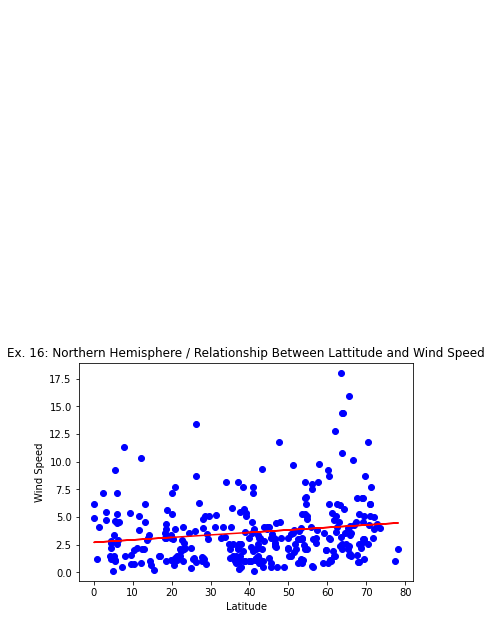

The correlation coefficient is 0.16
The line equation is as follows:  y = 0.02x + 2.72


In [88]:
#Compare latitude to windspeed
x_axis = northern["Lat"]
y_axis = northern["Wind Speed"]
plt.title("Ex. 16: Northern Hemisphere / Relationship Between Lattitude and Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.scatter(x_axis, y_axis, marker="o", color="blue")
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.savefig("output_data/16chart_northlat2wind.png")
plt.show()
print(f"The correlation coefficient is {round(st.pearsonr(x_axis,y_axis)[0],2)}")
print(f"The line equation is as follows:  {line_eq}")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

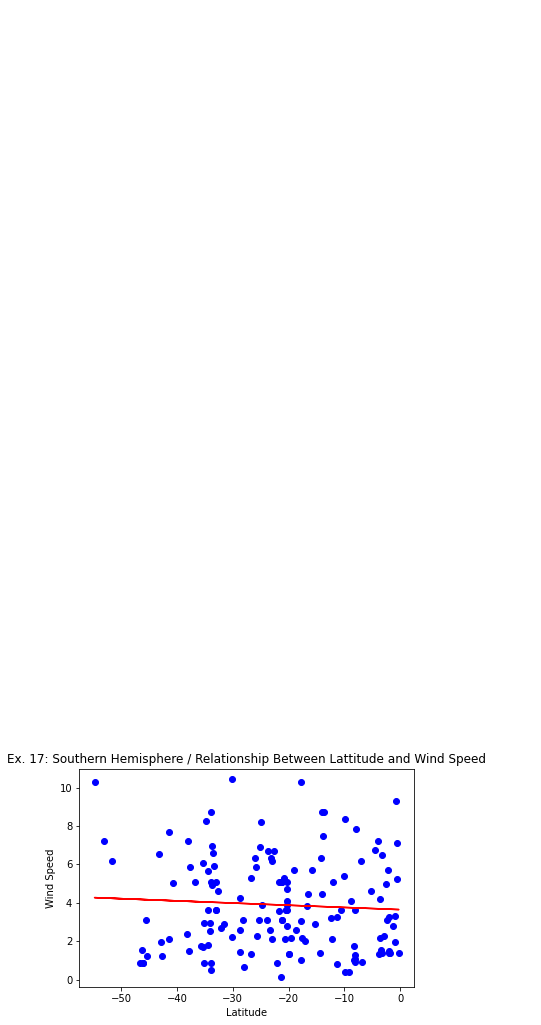

The correlation coefficient is -0.06
The line equation is as follows:  y = -0.01x + 3.64


In [89]:
# Compare latitude to Wind Speed
x_axis = southern["Lat"]
y_axis = southern["Wind Speed"]
plt.title("Ex. 17: Southern Hemisphere / Relationship Between Lattitude and Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.scatter(x_axis, y_axis, marker="o", color="blue")
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis.astype(float), y_axis.astype(float))
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.savefig("output_data/17chart_southlat2windspeed.png")
plt.show()
print(f"The correlation coefficient is {round(st.pearsonr(x_axis,y_axis)[0],2)}")
print(f"The line equation is as follows:  {line_eq}")